In [1]:
from __future__ import print_function

import os
import tempfile

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

import cortex.polyutils

%matplotlib inline

In [2]:
subject = 'S1'

plot_kwargs = {'vmin': -1, 'vmax': 1, 'cmap': 'viridis'}

left, right = cortex.db.get_surf(subject, 'fiducial')
left_surface = cortex.polyutils.Surface(left[0], left[1])
right_surface = cortex.polyutils.Surface(right[0], right[1])

# create subsurface

In [3]:
center = 125000
radius = 7

patch = left_surface.get_geodesic_patch(center, radius=radius)
subsurface = left_surface.create_subsurface(vertex_mask=patch['vertex_mask'])

# plot data on subsurface

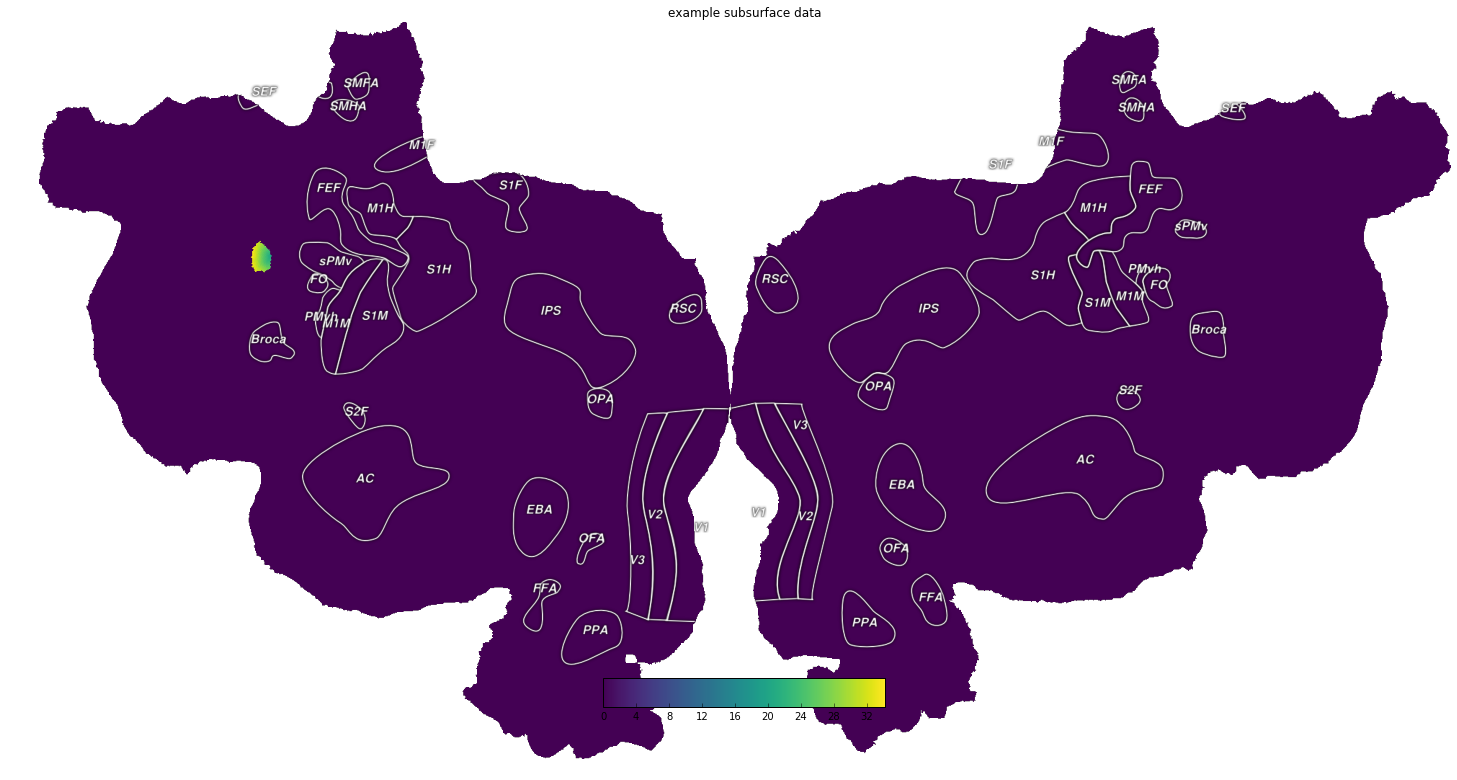

In [4]:
data = subsurface.geodesic_distance([0]) + 20
dataset = cortex.Vertex(subsurface.lift_subsurface_data(data), subject, cmap='viridis')
cortex.quickshow(dataset)
plt.title('example subsurface data')
plt.show()

# plot subsurface as gif

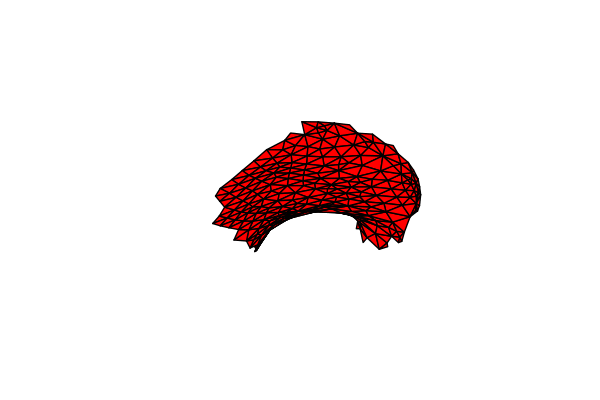

In [5]:
f, path = tempfile.mkstemp()
path = path + '.gif'
subsurface.plot_subsurface_rotating_gif(path=path)

with open(path,'rb') as f:
    display(Image(data=f.read(), format='png'))

plt.close()

# create many patches

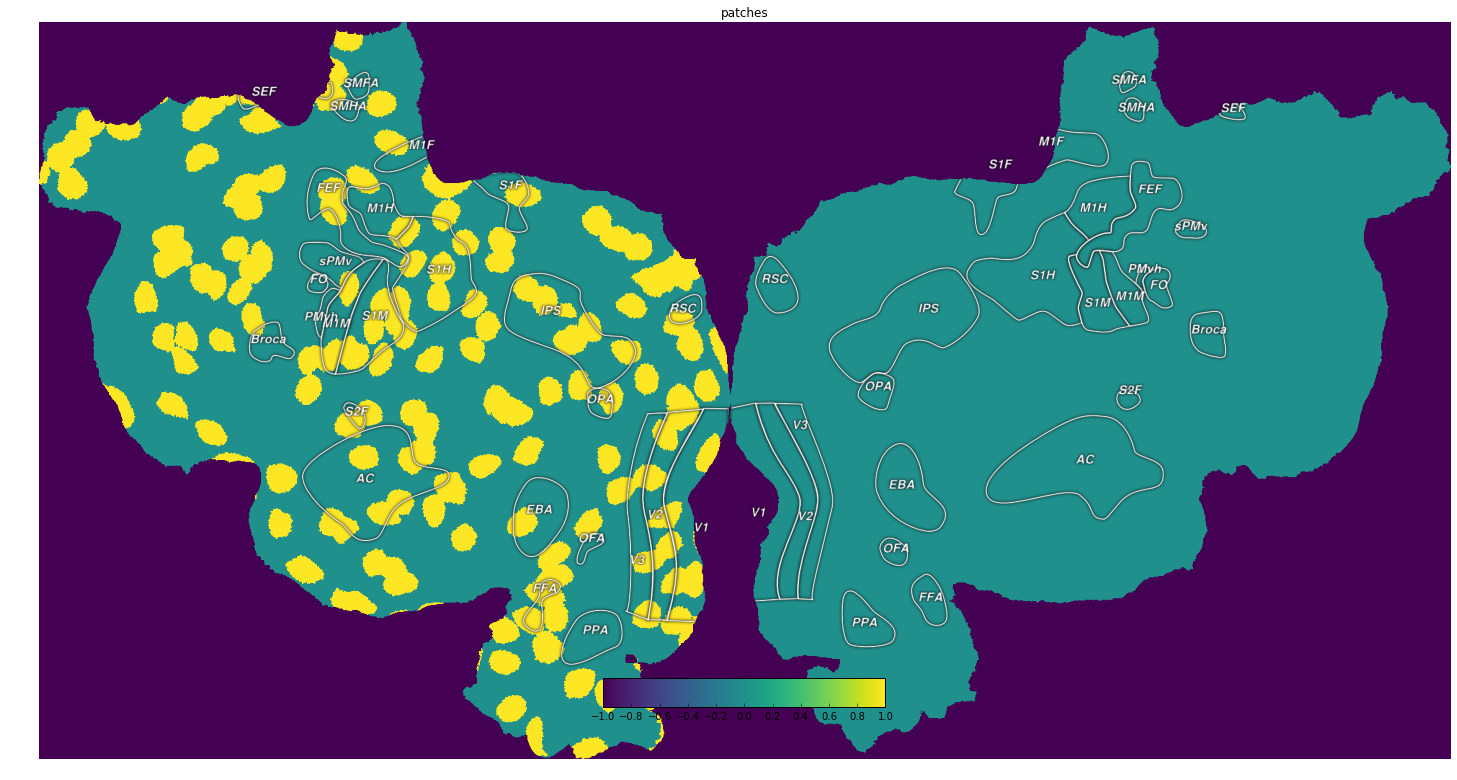

In [6]:
patches = left_surface.get_geodesic_patches(
    seeds=np.arange(0, 150000, 1000),
    radius=8,
)

dataset = cortex.Vertex(
    patches['vertex_masks'].sum(0),
    subject,
    cmap='viridis',
    vmin=-1,
    vmax=1,
)
cortex.quickshow(dataset)
plt.title('patches')
plt.show()

# create geodesic strip patch

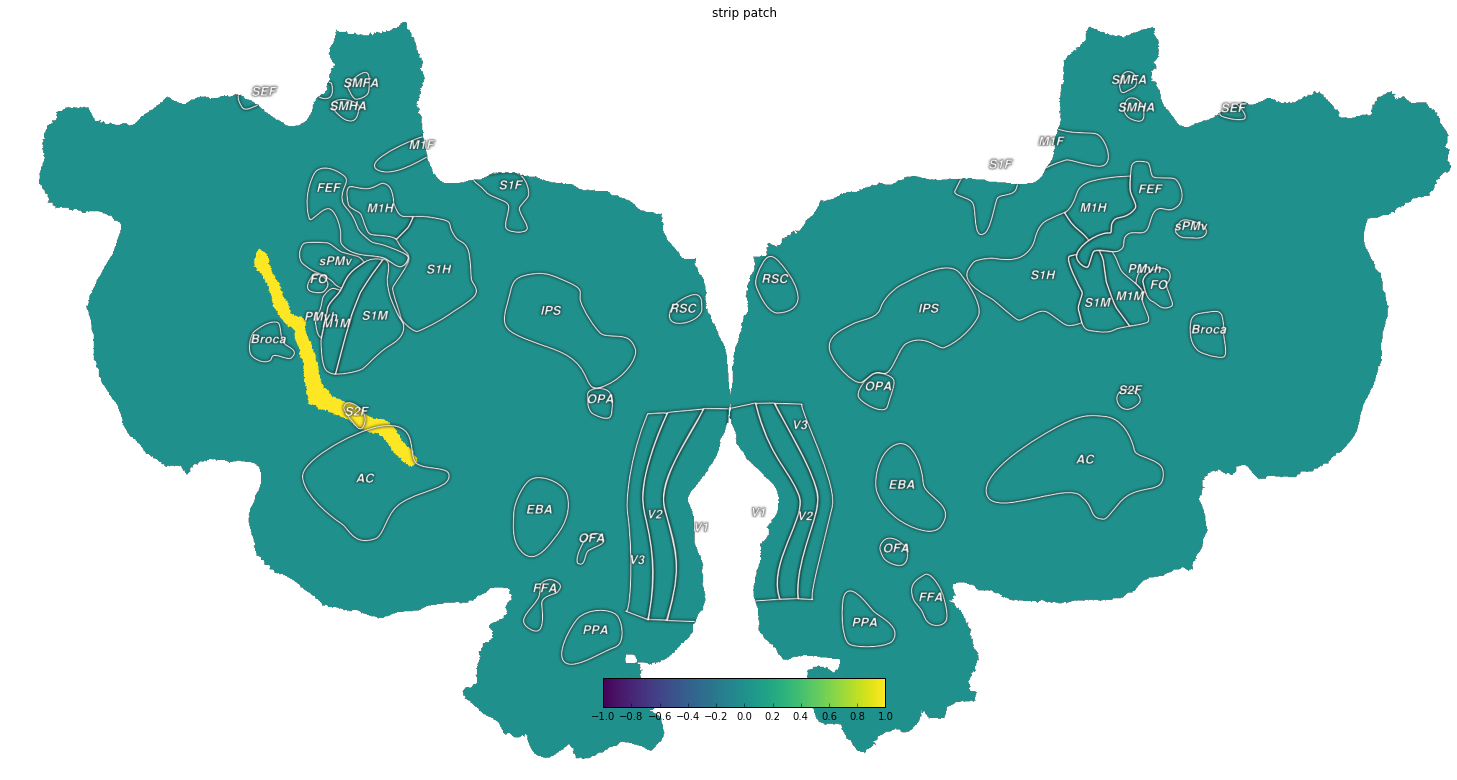

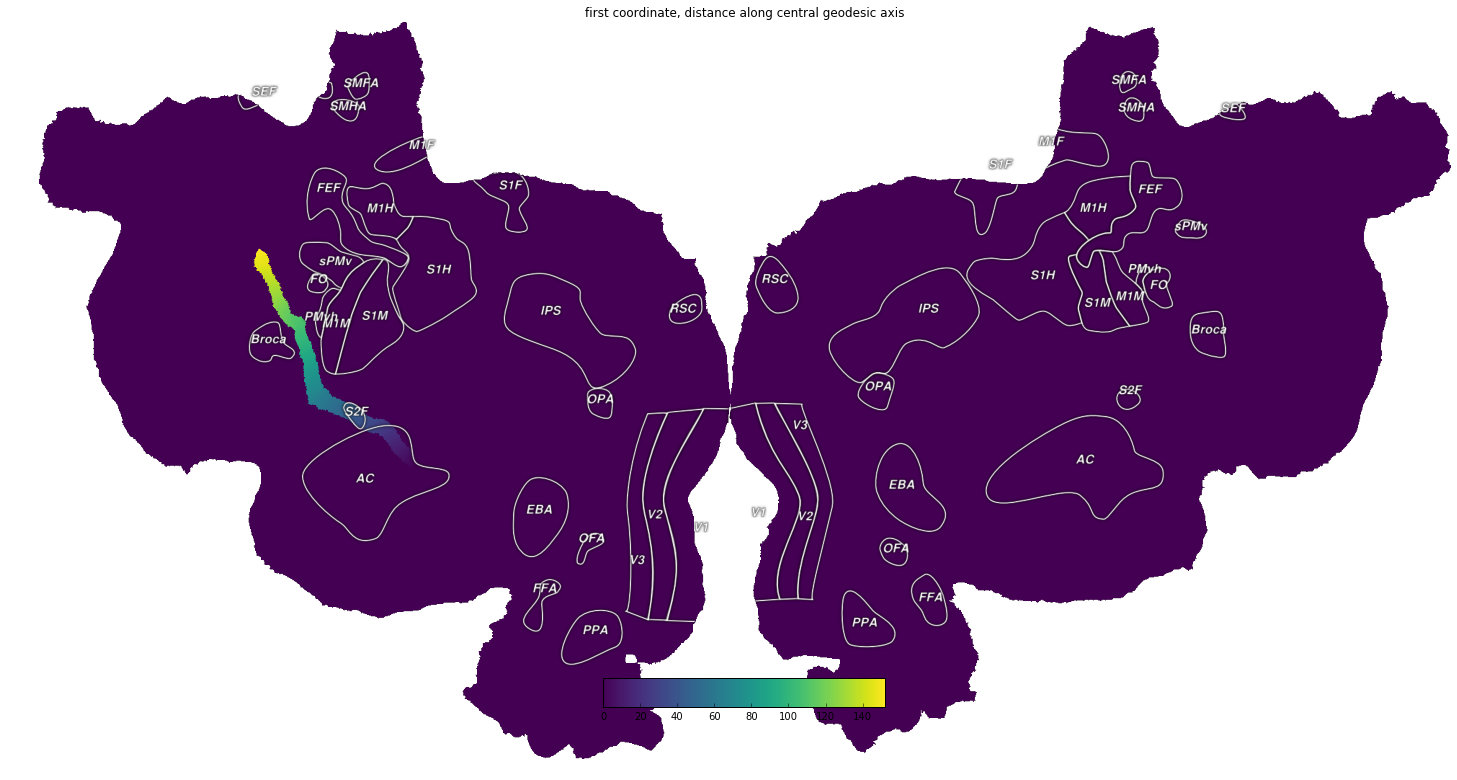

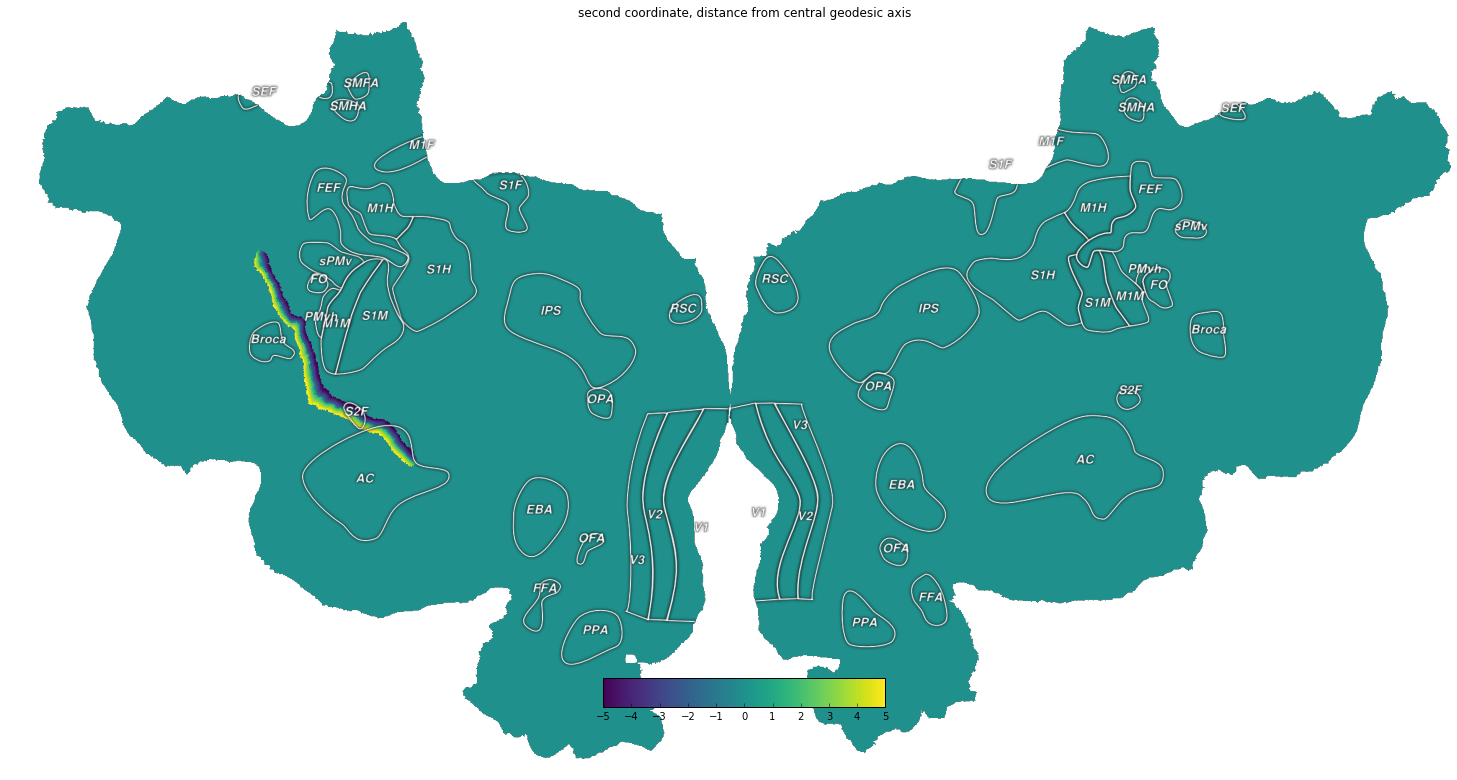

In [7]:
patch = left_surface.get_geodesic_strip_patch(v0=70000, v1=125000, radius=5)

dataset = cortex.Vertex(patch['vertex_mask'], subject, vmin=-1, vmax=1, cmap='viridis')
cortex.quickshow(dataset)
plt.title('strip patch')
plt.show()

dataset = cortex.Vertex(patch['coordinates'][0, :], subject, cmap='viridis')
cortex.quickshow(dataset)
plt.title('first coordinate, distance along central geodesic axis')
plt.show()

dataset = cortex.Vertex(patch['coordinates'][1, :], subject, cmap='viridis', vmin=-5, vmax=5)
cortex.quickshow(dataset)
plt.title('second coordinate, distance from central geodesic axis')
plt.show()